<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/Gradient%20Descent/Gradient_Descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('/content/test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [93]:
# check for missing values
df.isna().sum()

name    0
math    0
cs      0
dtype: int64

In [94]:
# remove the name column

df.drop(columns=['name'],inplace=True)

Text(0, 0.5, 'cs marks')

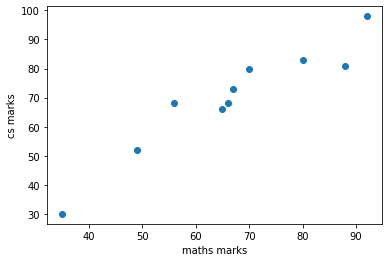

In [95]:
# plot the datapoints on the graph

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('maths marks')
plt.ylabel('cs marks')

In [96]:
def gradient_descent(X,y):
  learning_rate = 0.0002
  epochs= 10000000
  m = 1
  b = 0
  n = df.shape[0]

  for i in range(1,epochs+1):
    y_pred = m*X + b
    cost = 1/n * (np.sum((y-y_pred)**2)) 
    md = (-2/n) * np.sum(X*(y-y_pred))
    bd = (-2/n) * np.sum(y-y_pred)
    m = m - (learning_rate * md)
    b = b - (learning_rate*bd)

  return m,b,cost


In [97]:
m,b,cost = gradient_descent(df['math'].values,df['cs'].values)

In [98]:
# The cost function value
cost

31.604511333529594

In [99]:
y_pred = m*df['math'].values + b
y_pred

array([95.54695319, 58.90844863, 91.47600824, 73.15675596, 83.33411834,
       51.78429497, 68.06807477, 37.53598764, 69.08581101, 70.10354725])

Text(0, 0.5, 'cs marks')

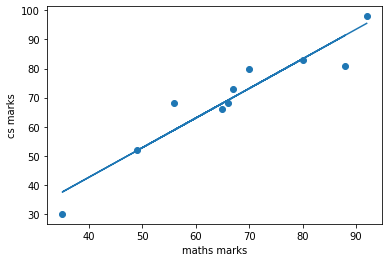

In [100]:
# plot the datapoints on the graph

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.plot(df['math'].values,y_pred)
plt.xlabel('maths marks')
plt.ylabel('cs marks')

In [101]:
# make a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(df[['math']],df['cs'])

y_pred = lr.predict(df[['math']])

In [102]:
y_pred

array([95.54695319, 58.90844863, 91.47600824, 73.15675596, 83.33411834,
       51.78429497, 68.06807477, 37.53598764, 69.08581101, 70.10354725])

Text(0, 0.5, 'cs marks')

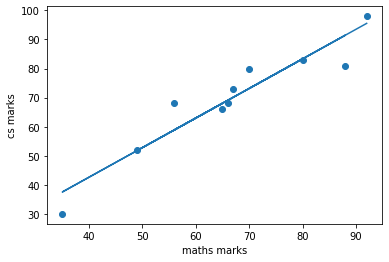

In [103]:
# plot the datapoints on the graph

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.plot(df['math'].values,y_pred)
plt.xlabel('maths marks')
plt.ylabel('cs marks')

In [104]:
print(m,lr.coef_)
print(b,lr.intercept_)

1.0177362378570007 [1.01773624]
1.9152193111520754 1.9152193111569034


In [105]:
# compare the cost functions

lr_cost = 1/len(df) * (np.sum((df['cs'].values-y_pred)**2))

print('The GD cost is',cost)
print('The regression model cost is',lr_cost)

The GD cost is 31.604511333529594
The regression model cost is 31.604511333529587
